<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/PAAD_RandomForest_Treatment_type_withTreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PAAD - Random Forest - Treatment type
author: jose.bobes at udc.es



In [49]:
# Importing Required Libraries
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import metrics

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

Python: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [50]:
# Loading Data
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/Libro1_Adapted.csv"
columns = ['ns10:file_uuid','ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage', 'ns5:vital_status', 'ns5:days_to_death', 'therapy_type']

dataset = pd.read_csv(url, sep=';', usecols=columns, encoding = "ISO-8859-1")

print(dataset.shape)
print(dataset.head())

(205, 11)
                         ns10:file_uuid ns2:gender                   ns5:race  \
0  1AF64746-0F41-408F-9CB3-D567BEBA1217     FEMALE                      WHITE   
1  0D7B23AC-0988-4E95-9AF3-82180A1DAB0A     FEMALE                      WHITE   
2  290AC731-F653-432D-8C35-8E6C178BD2C6     FEMALE                      WHITE   
3  E2FC1DD6-0B4D-409D-9D1C-0F8E0ADB6113     FEMALE  BLACK OR AFRICAN AMERICAN   
4  40A76730-988D-4FF1-A17A-91AA85DD7C76       MALE                      WHITE   

   ns5:age_at_initial_pathologic_diagnosis ns3:pathologic_stage  \
0                                       53            Stage IIB   
1                                       54            Stage IIA   
2                                       58             Stage IV   
3                                       66            Stage IIA   
4                                       64            Stage IIA   

  ns3:pathologic_T ns3:pathologic_N ns3:pathologic_M ns5:vital_status  \
0               T3         

In [51]:
# Feature Selection
# Split dataset in features and target variables (REF: https://www.datacamp.com/tutorial/decision-tree-classification-python)
feature_cols = ['ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage']

X = dataset[feature_cols] # Features
X_encoded = pd.get_dummies(X)
y = dataset.therapy_type # Target variable

In [68]:
# Building Random Forest Model

# Create Random Forest classifer object
rf = RandomForestClassifier(bootstrap=True, max_samples= 130, max_depth=3)

# Train Random Forest Classifer
rf = rf.fit(X_encoded, y)

#Predict the response for test dataset
y_pred = clf.predict(X_encoded)


In [66]:
# Evaluating Model
print("Accuracy: ", metrics.accuracy_score(y, y_pred))

Accuracy:  0.9414634146341463


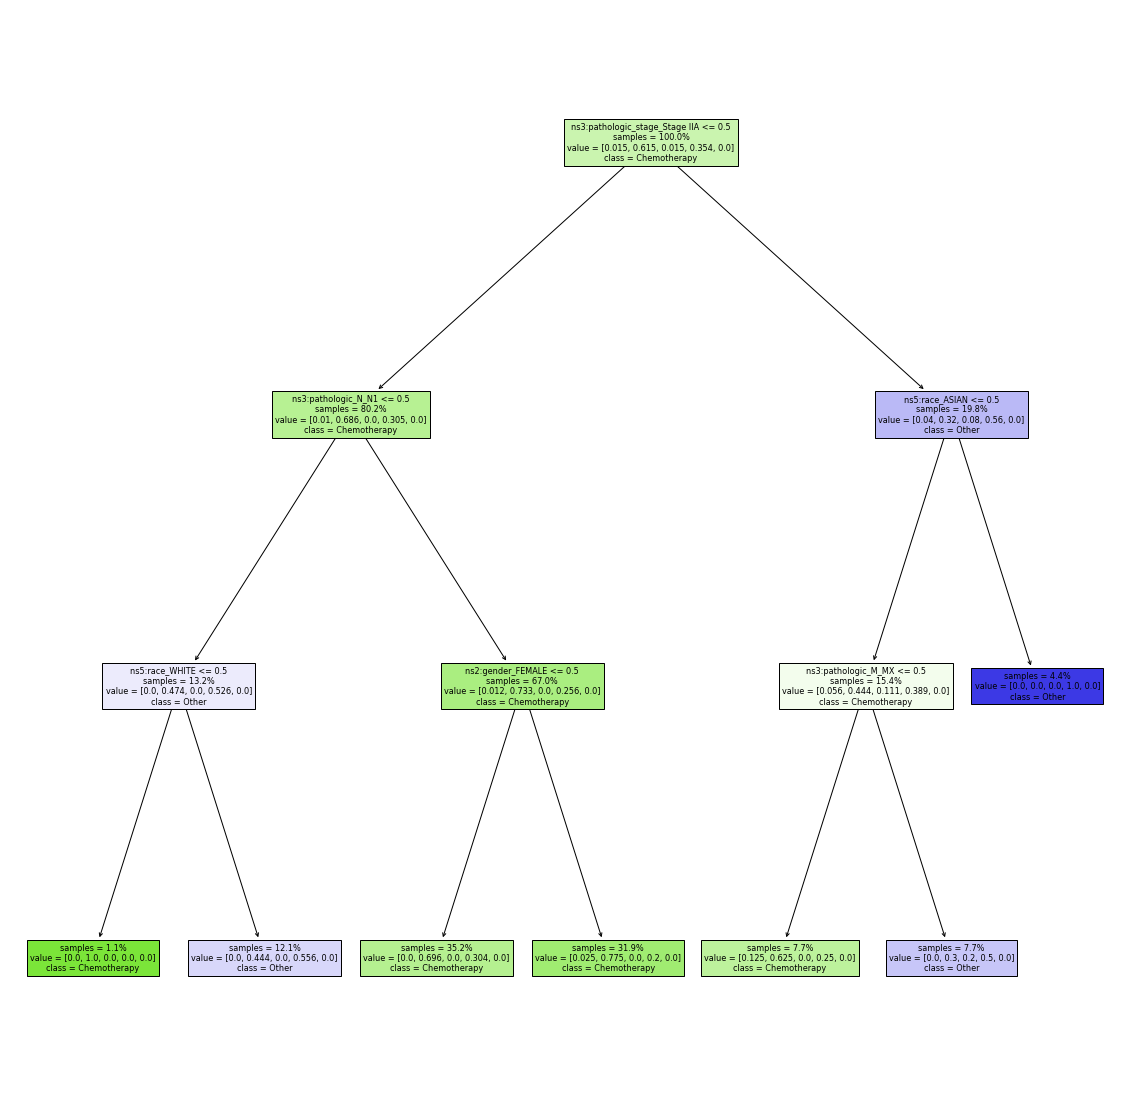

In [62]:
# Visualizing the decision tree
fig = plt.figure(figsize=((20,20)))
plot_tree(rf.estimators_[0],
            feature_names = X_encoded.columns,
            class_names=['Ancillary', 'Chemotherapy', 'Hormone Therapy', 'Other', 'Vaccine'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

In [ ]:
# Visualize more details
!pip install -q dtreeviz
from dtreeviz.trees import dtreeviz # will be used for tree visualization

In [87]:
viz = dtreeviz(rf.estimators_[0], 
               X_encoded,
               y, 
               feature_names=X_encoded.columns, 
               target_name="Therapy type",
               class_names=['Ancillary', 'Chemotherapy', 'Hormone Therapy', 'Other', 'Vaccine'],
               orientation='LR')
viz

ValueError: ignored